<a href="https://colab.research.google.com/github/Lham13/boids/blob/main/gradeproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
print ("Hello, Colab!")



Hello, Colab!


In [8]:
import numpy as np

x = np.linspace(0, 10, 100)
x[:5]


array([0.       , 0.1010101, 0.2020202, 0.3030303, 0.4040404])

In [9]:
import pandas as pd

df = pd.read_csv('grades.csv')

df.head(10)



,Student,Math_Score,Science_Score
0,Alice,92,88
1,Bob,75,80
2,Charlie,88,91
3,David,65,70
4,Eve,95,94
5,Frank,70,72
6,Grace,82,85
7,Henry,90,90
8,Ivy,60,63
9,Jack,78,75


In [10]:
df.columns

Index([' Student', 'Math_Score', 'Science_Score'], dtype='object')

In [11]:
# حذف فاصله‌های اضافی از اول و آخر اسم ستون‌ها
df.columns = [c.strip() for c in df.columns]

df.columns

Index(['Student', 'Math_Score', 'Science_Score'], dtype='object')

In [13]:
# آمار ساده برای نمره‌ی ریاضی
math_mean = df['Math_Score'].mean()
math_min  = df['Math_Score'].min()
math_max  = df['Math_Score'].max()
math_std  = df['Math_Score'].std()

# آمار ساده برای نمره‌ی علوم
science_mean = df['Science_Score'].mean()
science_min  = df['Science_Score'].min()
science_max  = df['Science_Score'].max()
science_std  = df['Science_Score'].std()

print("Math - mean:", math_mean)
print("Math - min:", math_min)
print("Math - max:", math_max)
print("Math - std:", math_std)

print("Science - mean:", science_mean)
print("Science - min:", science_min)
print("Science - max:", science_max)
print("Science - std:", science_std)

Math - mean: 80.5
Math - min: 60
Math - max: 95
Math - std: 9.923390761757108
Science - mean: 81.3
Science - min: 63
Science - max: 96
Science - std: 9.646924789524217


In [14]:
df[['Math_Score', 'Science_Score']].describe()

,Math_Score,Science_Score
count,20.000000,20.000000
mean,80.500000,81.300000
std,9.923391,9.646925
min,60.000000,63.000000
25%,74.250000,73.500000
50%,81.000000,81.500000
75%,88.500000,89.250000
max,95.000000,96.000000


چه کسانی بالاتر / پایین‌تر از میانگین هستند؟

In [15]:
math_mean = df['Math_Score'].mean()

math_above = df[df['Math_Score'] > math_mean]          # بالاتر از میانگین
math_below_or_equal = df[df['Math_Score'] <= math_mean] # پایین‌تر یا مساوی میانگین

math_above, math_below_or_equal

(                    Student  Math_Score  Science_Score
 0                     Alice          92             88
 2                   Charlie          88             91
 4                       Eve          95             94
 6                     Grace          82             85
 7                     Henry          90             90
 10                    Kelly          85             89
 11                     Liam          91             93
 14                   Olivia          84             80
 15                    Peter          93             96
 18                     Sara          86             87,
                   Student  Math_Score  Science_Score
 1                     Bob          75             80
 3                   David          65             70
 5                   Frank          70             72
 8                     Ivy          60             63
 9                    Jack          78             75
 12                    Mia          68             71
 13  

کسانی که در هر دو درس بالاتر از میانگین‌اند:

In [17]:
both_above = df[(df['Math_Score'] > math_mean) & (df['Science_Score'] > science_mean)]
both_above


,Student,Math_Score,Science_Score
0,Alice,92,88
2,Charlie,88,91
4,Eve,95,94
6,Grace,82,85
7,Henry,90,90
10,Kelly,85,89
11,Liam,91,93
15,Peter,93,96
18,Sara,86,87


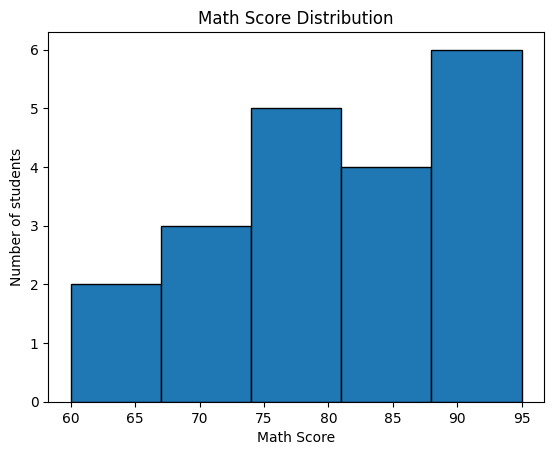

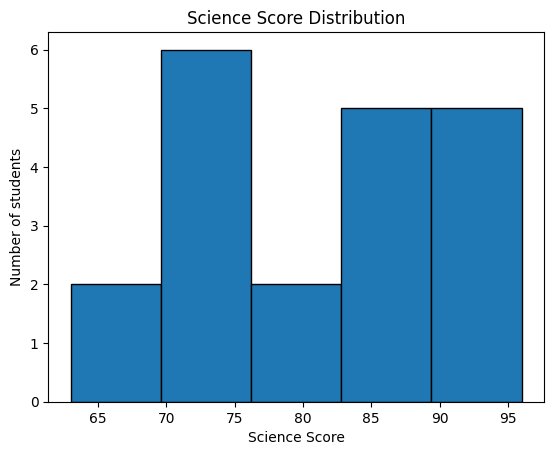

In [18]:
import matplotlib.pyplot as plt

# هیستوگرام نمرات ریاضی
plt.hist(df['Math_Score'], bins=5, edgecolor='black')
plt.xlabel('Math Score')
plt.ylabel('Number of students')
plt.title('Math Score Distribution')
plt.show()

# هیستوگرام نمرات علوم
plt.hist(df['Science_Score'], bins=5, edgecolor='black')
plt.xlabel('Science Score')
plt.ylabel('Number of students')
plt.title('Science Score Distribution')
plt.show()

/tmp/ipython-input-4238922024.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


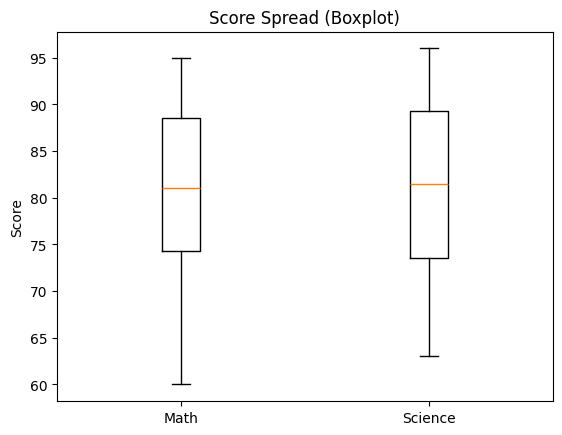

In [19]:
plt.boxplot(
    [df['Math_Score'], df['Science_Score']],
    labels=['Math', 'Science']
)
plt.ylabel('Score')
plt.title('Score Spread (Boxplot)')
plt.show()


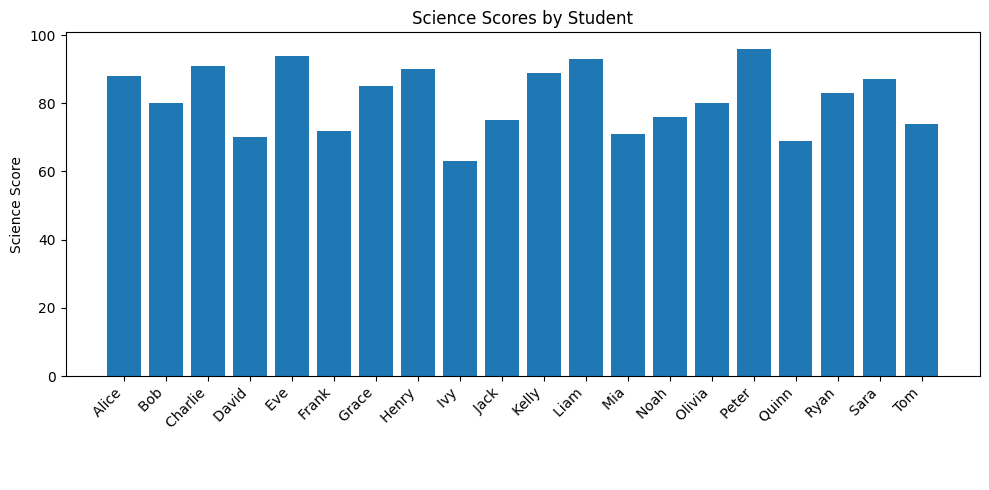

In [20]:
plt.figure(figsize=(10, 5))
plt.bar(df['Student'], df['Science_Score'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Science Score')
plt.title('Science Scores by Student')
plt.tight_layout()
plt.show()
